In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [29]:
df=pd.read_csv("email_spam_detection.csv")
df

,has_free,has_win,has_offer,has_click,has_money,Spam
0,0,1,0,1,1,1
1,1,0,1,1,0,1
2,0,0,1,1,0,0
3,0,0,1,1,0,0
4,0,0,1,0,1,0
...,...,...,...,...,...,...
995,0,0,0,1,0,0
996,0,1,0,1,1,1
997,1,0,0,1,0,0
998,1,0,1,1,1,1


In [30]:
x=df.drop("Spam",axis=1)
y=df["Spam"]

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
model=BernoulliNB()
model.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [33]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0])

In [34]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

1.0

In [35]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 96,   0],
       [  0, 104]])

In [36]:
cross=cross_validate(model,x,y,cv=5,return_train_score=True)
cross

{'fit_time': array([0.        , 0.00201058, 0.00204682, 0.00312972, 0.        ]),
 'score_time': array([0.        , 0.00345302, 0.00201321, 0.        , 0.        ]),
 'test_score': array([1., 1., 1., 1., 1.]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [37]:
cla=classification_report(y_test,y_pred)
cla

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        96\n           1       1.00      1.00      1.00       104\n\n    accuracy                           1.00       200\n   macro avg       1.00      1.00      1.00       200\nweighted avg       1.00      1.00      1.00       200\n'

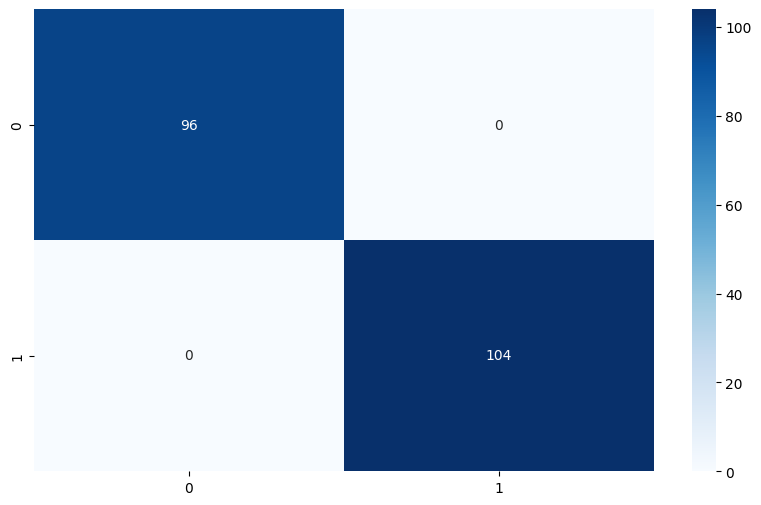

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d',cmap="Blues")
plt.show()

In [39]:
new_data=np.array([1,1,1,1,1])
predict=model.predict([new_data])
predict

c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([1])